#  PREDICTING BREAST CANCER USING SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### IMPORTING THE DATASET

In [2]:
df=pd.read_csv('Breast_Cancer.csv')

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## CHECKING FOR NULL VALUES

<AxesSubplot:>

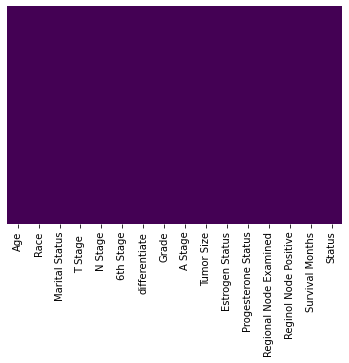

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### No null values are detected. 

#  UNDERSTANDING POPULATION DISTRIBUTION

<AxesSubplot:xlabel='Race', ylabel='count'>

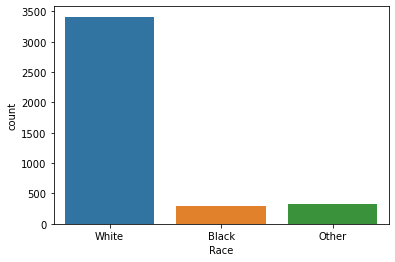

In [5]:
sns.countplot(x='Race',data=df)

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

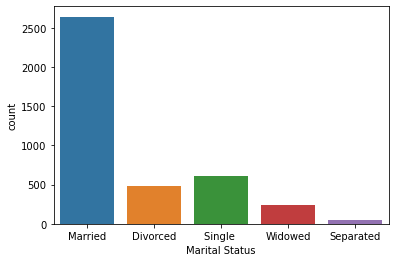

In [6]:
sns.countplot(x='Marital Status',data=df)

<AxesSubplot:xlabel='T Stage ', ylabel='count'>

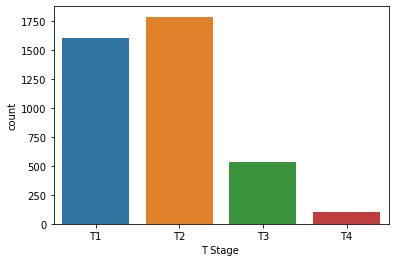

In [7]:
sns.countplot(x='T Stage ',data=df)

<AxesSubplot:xlabel='N Stage', ylabel='count'>

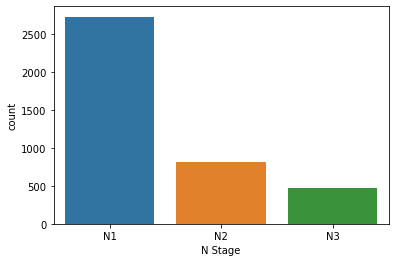

In [8]:
sns.countplot(x='N Stage',data=df)

<AxesSubplot:xlabel='6th Stage', ylabel='count'>

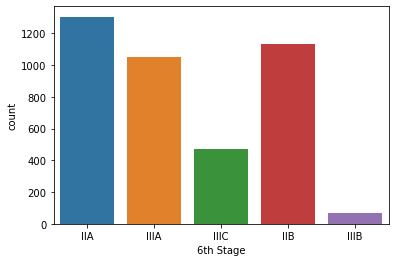

In [9]:
sns.countplot(x='6th Stage',data=df)

<AxesSubplot:xlabel='differentiate', ylabel='count'>

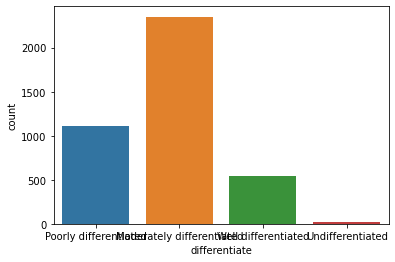

In [10]:
sns.countplot(x='differentiate',data=df)

<AxesSubplot:xlabel='Grade', ylabel='count'>

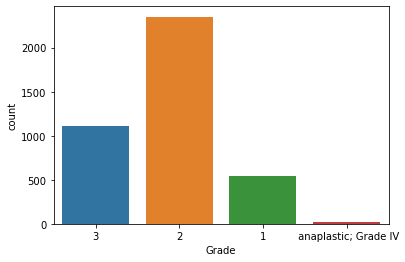

In [11]:
sns.countplot(x='Grade',data=df)

<AxesSubplot:xlabel='A Stage', ylabel='count'>

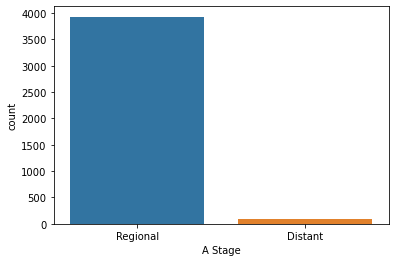

In [12]:
sns.countplot(x='A Stage',data=df)

<AxesSubplot:xlabel='Estrogen Status', ylabel='count'>

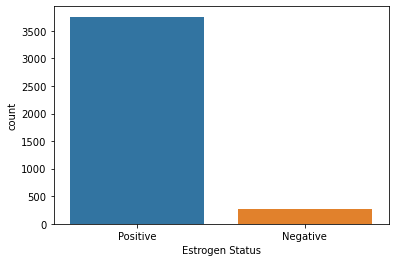

In [13]:
sns.countplot(x='Estrogen Status',data=df)

<AxesSubplot:xlabel='Progesterone Status', ylabel='count'>

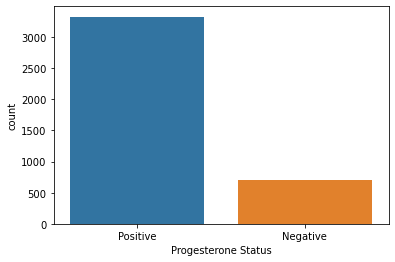

In [14]:
sns.countplot(x='Progesterone Status',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

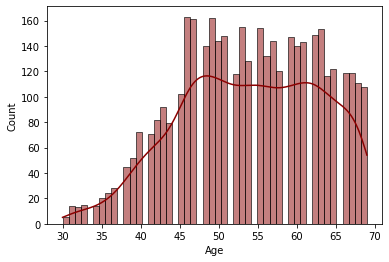

In [15]:
sns.histplot(df['Age'].dropna(),color='darkred',kde=True,bins=50)

<AxesSubplot:xlabel='Tumor Size', ylabel='Count'>

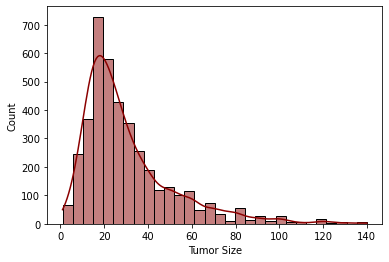

In [16]:
sns.histplot(df['Tumor Size'].dropna(),color='darkred',kde=True,bins=30)

<AxesSubplot:xlabel='Regional Node Examined', ylabel='Count'>

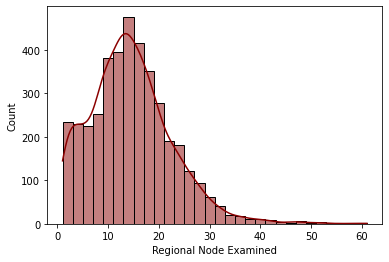

In [17]:
sns.histplot(df['Regional Node Examined'].dropna(),color='darkred',kde=True,bins=30)

<AxesSubplot:xlabel='Reginol Node Positive', ylabel='Count'>

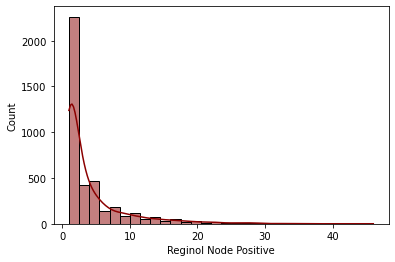

In [18]:
sns.histplot(df['Reginol Node Positive'].dropna(),color='darkred',kde=True,bins=30)

<AxesSubplot:xlabel='Survival Months', ylabel='Count'>

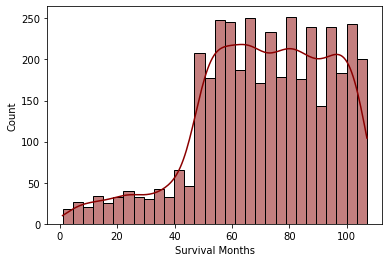

In [19]:
sns.histplot(df['Survival Months'].dropna(),color='darkred',kde=True,bins=30)

In [20]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

## CHECKING FOR ALL UNIQUE VALUES IN THE COLUMNS AND CORRESPONDING VALUE                                                                           COUNTS

In [21]:
df['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [22]:
df['T Stage '].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [23]:
df['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [24]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [25]:
df['Marital Status'].value_counts()

Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

In [26]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [27]:
df['differentiate'].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [28]:
df['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

In [29]:
df['Estrogen Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [30]:
df['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [31]:
df['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

# FEATURE ENGINEERING 
  Using ONE HOT ENCODING to convert objects to u-int values

In [32]:
one_hot_encoded_data = pd.get_dummies(df, columns = [ 'Race','Grade', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate',  'A Stage', 'Estrogen Status','Progesterone Status',  'Status'],drop_first=True)
print(one_hot_encoded_data)

      Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0      68           4                      24                      1   
1      50          35                      14                      5   
2      58          63                      14                      7   
3      58          18                       2                      1   
4      47          41                       3                      1   
...   ...         ...                     ...                    ...   
4019   62           9                       1                      1   
4020   56          46                      14                      8   
4021   68          22                      11                      3   
4022   58          44                      11                      1   
4023   46          30                       7                      2   

      Survival Months  Race_Other  Race_White  Grade_1  Grade_2  Grade_3  ...  \
0                  60           0           1        0

In [33]:
one_hot_encoded_data.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Other,Race_White,Grade_1,Grade_2,Grade_3,...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
0,68,4,24,1,60,0,1,0,0,1,...,0,0,0,1,0,0,1,1,1,0
1,50,35,14,5,62,0,1,0,1,0,...,1,0,0,0,0,0,1,1,1,0
2,58,63,14,7,75,0,1,0,1,0,...,0,0,1,0,0,0,1,1,1,0
3,58,18,2,1,84,0,1,0,0,1,...,0,0,0,1,0,0,1,1,1,0
4,47,41,3,1,50,0,1,0,0,1,...,0,0,0,1,0,0,1,1,1,0


In [34]:
one_hot_encoded_data.columns

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Race_Other', 'Race_White', 'Grade_1', 'Grade_2',
       'Grade_3', 'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T2',
       'T Stage _T3', 'T Stage _T4', 'N Stage_N2', 'N Stage_N3',
       '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Poorly differentiated', 'differentiate_Undifferentiated',
       'differentiate_Well differentiated', 'A Stage_Regional',
       'Estrogen Status_Positive', 'Progesterone Status_Positive',
       'Status_Dead'],
      dtype='object')

In [35]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Age                                  4024 non-null   int64
 1   Tumor Size                           4024 non-null   int64
 2   Regional Node Examined               4024 non-null   int64
 3   Reginol Node Positive                4024 non-null   int64
 4   Survival Months                      4024 non-null   int64
 5   Race_Other                           4024 non-null   uint8
 6   Race_White                           4024 non-null   uint8
 7   Grade_1                              4024 non-null   uint8
 8   Grade_2                              4024 non-null   uint8
 9   Grade_3                              4024 non-null   uint8
 10  Marital Status_Married               4024 non-null   uint8
 11  Marital Status_Separated             4024 non-null   uin

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X= pd.DataFrame(one_hot_encoded_data,columns=one_hot_encoded_data.columns[:-2])
y=one_hot_encoded_data['Status_Dead']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=205)

In [38]:
from sklearn.svm import SVC

In [39]:
model=SVC()

In [40]:
model.fit(X_train,y_train)

SVC()

In [41]:
predictions=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix


In [42]:
print(confusion_matrix(y_test,predictions))

[[1012   16]
 [ 120   60]]


In [43]:
model.score(X_train,y_train)

0.8852982954545454

In [44]:
model.score(X_test,y_test)

0.8874172185430463

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1028
           1       0.79      0.33      0.47       180

    accuracy                           0.89      1208
   macro avg       0.84      0.66      0.70      1208
weighted avg       0.88      0.89      0.87      1208



## We don't feel it satisfactory enough.


Observe that our type 2 error is way beyond LOS.

This means our models need to be adjusted.


# USING GRIDSEARCH
We need to have the parameters adjusted using Gridsearch.
This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [46]:
param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid= GridSearchCV(SVC(),param_grid,refit=True,verbose=10)

In [49]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/30] END ..C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   0.9s
[CV 2/5; 1/30] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/30] END ..C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   0.9s
[CV 3/5; 1/30] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/30] END ..C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   1.0s
[CV 4/5; 1/30] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/30] END ..C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   1.0s
[CV 5/5; 1/30] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/30] END ..C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   1.0s
[CV 1/5; 2/30] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/5; 2/30] END C=0.1, gamma=0.1, kernel=rbf

[CV 1/5; 11/30] END ..C=10, gamma=1, kernel=rbf;, score=0.844 total time=   1.0s
[CV 2/5; 11/30] START C=10, gamma=1, kernel=rbf.................................
[CV 2/5; 11/30] END ..C=10, gamma=1, kernel=rbf;, score=0.845 total time=   1.0s
[CV 3/5; 11/30] START C=10, gamma=1, kernel=rbf.................................
[CV 3/5; 11/30] END ..C=10, gamma=1, kernel=rbf;, score=0.845 total time=   1.1s
[CV 4/5; 11/30] START C=10, gamma=1, kernel=rbf.................................
[CV 4/5; 11/30] END ..C=10, gamma=1, kernel=rbf;, score=0.845 total time=   1.0s
[CV 5/5; 11/30] START C=10, gamma=1, kernel=rbf.................................
[CV 5/5; 11/30] END ..C=10, gamma=1, kernel=rbf;, score=0.845 total time=   1.0s
[CV 1/5; 12/30] START C=10, gamma=0.1, kernel=rbf...............................
[CV 1/5; 12/30] END C=10, gamma=0.1, kernel=rbf;, score=0.844 total time=   0.6s
[CV 2/5; 12/30] START C=10, gamma=0.1, kernel=rbf...............................
[CV 2/5; 12/30] END C=10, ga

[CV 2/5; 21/30] END C=1000, gamma=1, kernel=rbf;, score=0.845 total time=   1.2s
[CV 3/5; 21/30] START C=1000, gamma=1, kernel=rbf...............................
[CV 3/5; 21/30] END C=1000, gamma=1, kernel=rbf;, score=0.845 total time=   1.1s
[CV 4/5; 21/30] START C=1000, gamma=1, kernel=rbf...............................
[CV 4/5; 21/30] END C=1000, gamma=1, kernel=rbf;, score=0.845 total time=   1.2s
[CV 5/5; 21/30] START C=1000, gamma=1, kernel=rbf...............................
[CV 5/5; 21/30] END C=1000, gamma=1, kernel=rbf;, score=0.845 total time=   1.1s
[CV 1/5; 22/30] START C=1000, gamma=0.1, kernel=rbf.............................
[CV 1/5; 22/30] END C=1000, gamma=0.1, kernel=rbf;, score=0.844 total time=   0.7s
[CV 2/5; 22/30] START C=1000, gamma=0.1, kernel=rbf.............................
[CV 2/5; 22/30] END C=1000, gamma=0.1, kernel=rbf;, score=0.842 total time=   0.7s
[CV 3/5; 22/30] START C=1000, gamma=0.1, kernel=rbf.............................
[CV 3/5; 22/30] END C=10

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=10)

In [50]:
grid.best_params_

{'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [53]:
grid.best_estimator_

SVC(C=10000, gamma=0.0001)

In [54]:
grid_predictions = grid.predict(X_test)

In [55]:
print(confusion_matrix(y_test,grid_predictions))

[[1014   14]
 [  97   83]]


In [56]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1028
           1       0.86      0.46      0.60       180

    accuracy                           0.91      1208
   macro avg       0.88      0.72      0.77      1208
weighted avg       0.90      0.91      0.90      1208



In [57]:
grid.score(X_train,y_train)

0.9119318181818182

In [58]:
grid.score(X_test,y_test)

0.9081125827814569